In [2]:
import random
import math
import numpy as np
import Parsing_midi as pm
import Init_chromo as init
import Melody_matching as mm
import count_CE as ce
import mido
from mido import Message, MidiFile, MidiTrack
from collections import Counter
import copy
import matplotlib.pyplot as plt
from itertools import combinations # product: 排列
import time
import multiprocessing as mp
import pretty_midi

/home/hsuan/env1/lib/python3.6/site-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [54]:
try_c = pm.get_midi('ori.mid', 0)  # star
# note_msg, midi_msg = pm.separate_song(midi_list, 1920)[:]

In [55]:
sw = [1920, 1440, 960]
for s in sw:   
    
    midi_list_new = pm.get_midi('star3.mid', 0)  # star
    midi_list_ori = pm.get_midi('star1.mid', 0)  # star

    def trans_note_list(song):
        return [song[i].note for i in range(len(song))]

    def flatten_list(midi_list):
        return [item for sublist in midi_list for item in sublist]

    note_msg_new, midi_new = pm.separate_song(midi_list_new, s)
    note_msg_ori, midi_ori = pm.separate_song(midi_list_ori, s)

    # origin_note = [trans_note_list(midi_msg_ori[i]) for i in range(len(midi_msg_ori))]
#     midi_new = midi_new[1:]

    CE = (ce.get_ce_list(midi_new))  
    CE_ =(ce.get_ce_list(midi_ori))

    t = []
    d = 0

    # calculate total length
    m_list = flatten_list(midi_new)
    for i in range(len(m_list)):
        d += m_list[i].time 
    print("TOTAL durstion", d)

    for i in range(len(midi_new)):
        t.append(harmony_score(midi_new[i], CE[i]))

    print("total", sum(t)/d*5000)

    #     print(ce_score(CE, CE_)/len(CE))

TOTAL durstion 22535
c 75
[2, 5, 9]
------note 0 60-------
note not in chord -0.94375
note in scale -0.3145833333333333
note in harmony degree 1.2583333333333333
------note 2 64-------
note not in chord 0.2583333333333333
note in scale 0.9249999999999999
note in harmony degree 2.5916666666666663
------note 4 67-------
note not in chord 2.0416666666666665
note in scale 2.408333333333333
note in harmony degree 3.3249999999999997
------note 6 72-------
note not in chord 1.8749999999999998
note in scale 2.8416666666666663
note in harmony degree 5.258333333333333
------note 8 76-------
note not in chord 4.258333333333333
note in scale 4.925
note in harmony degree 6.591666666666667
------note 10 79-------
note not in chord 6.041666666666667
note in scale 6.408333333333333
note in harmony degree 7.325
------note 12 84-------
note not in chord 5.875
note in scale 6.841666666666667
note in harmony degree 9.258333333333333
------note 14 79-------
note not in chord 8.258333333333333
note in scale

note not in chord 6.697916666666666
note in scale 6.9937499999999995
note in harmony degree 7.7333333333333325
------note 12 74-------
note in chord 9.077083333333333
note in scale 9.614583333333332
note in harmony degree 10.958333333333332
------note 14 72-------
note not in chord 10.552083333333332
note in scale 10.822916666666666
c 77
[5, 9, 0]
------note 0 81-------
note in chord 1.7125
note in scale 2.8541666666666665
note not in harmony degree 0.0
------note 2 80-------
note not in chord -1.0
note not in scale -1.6666666666666665
note not in harmony degree -3.333333333333333
------note 4 81-------
note in chord -2.783333333333333
note in scale -2.4166666666666665
note in harmony degree -1.5
------note 6 84-------
note in chord -0.050000000000000044
note in scale 0.9166666666666666
note in harmony degree 3.333333333333333
------note 8 83-------
note not in chord 2.333333333333333
note in scale 2.9999999999999996
c 78
[5, 9, 0]
------note 0 81-------
note in chord 0.549999999999999

In [61]:
# pm.to_midi_file(parent, 0 , 'star8.mid')

In [168]:
# pitch_ary = [[0,1,0],[-1,0,7],[0,-1,2],[1,0,9],[0,1,4],[-1,0,11],[0,-1,6], [1,0,1], [0,1,8],[-1,0,3],[0,-1,10],[1,0,5]]
pitch_ary = [[0,1,0],[0,-1,2],[0,1,4],[-1,0,11], [1,0,1],[-1,0,3],[1,0,5]]


## Get CE 
def count_unique(ary):
    u = []
    unique = [i for i in ary if i not in u]
    return unique, len(unique)

def count_CE(note_seq):
#     note_seq1, Dab = count_unique(notes_seq)
    Dab = len(note_seq)
    sum_dp = 0
    for pij in note_seq:
        dij = 1  # duration
        sum_dp += np.array(dij * pij)  
    CE = sum_dp/5
    return CE

# transform to coordinate
def trans_to_coordinate(seq):
    ary = []
    for i in range(len(seq)):
        if i % 2 == 0:
            pitch_ary[(seq[i].note) % 12][2] = seq[i].note
            ary.append(pitch_ary[(seq[i].note) % 12])
    return ary

def get_ce_list(midi_msg):
    xyz = [trans_to_coordinate(midi_msg[i]) for i in range(len(midi_msg))]    
    CE = [count_CE(xyz[i]) for i in range(len(xyz))]
    return CE

# compare the distance between new ce (generate by computer) and the original ce
def count_distance(ori, new):
    return round(np.sqrt(sum(np.array(ori - new) ** 2)), 2) 

In [169]:
temp = [[0,-1,2],[0,-1,2],[0,-1,2],[-1,0,11],[-1,0,11]] # DF

In [170]:
# temp=[]
# for i in range(len(midi_new[0])):
#     if i % 2 == 0:
#         temp.append((pitch_ary[(midi_new[0][i].note) % 12])) 
ce_position = count_CE(temp)

In [171]:
ce_position

array([-0.4, -0.6,  5.6])

In [172]:
sum_dist = []
for note in pitch_ary:
    dist = 0
    for i in range(3):
        dist += (ce_position[i]-note[i])**2
    sum_dist.append(dist)
sum_dist      

[34.08,
 13.279999999999998,
 5.279999999999999,
 29.880000000000003,
 23.479999999999997,
 7.479999999999998,
 2.6799999999999993]

In [117]:
def ce_score(CE, CE_):
    score_ce = 0  
      
    for i in range(len(CE)):
        try:
            dist = ce.count_distance(CE[i], CE_[i]) 
#             print(dist)
            if dist == 0.0:  # the chord remain
                score_ce += 100
            elif dist > 0 and dist <= 2:
                score_ce += 40*(dist)
            elif dist > 2 and dist <= 4:
                score_ce += 10*(dist)
            elif dist > 4 :
                score_ce -= 5*(dist)
        except:
            pass
    return score_ce

In [47]:
C_pitch = [0, -1, 2, -1, 4, 5, -1, 7, -1, 9, -1, 11]  # there is no sharp and flat in C scale, so set it as -1
chord_list = [[0,4,7],[-1,-1,-1],[2,5,9],[-1,-1,-1],[4,7,11],[5,9,0],[-1,-1,-1],[7,11,2],[-1,-1,-1],[9,0,4],[-1,-1,-1],[11,2,5]]
pitch_list = ['C','D','E','F','G','A','B']
scale_list = [0,2,4,5,7,9,11]  # = midi notes = ['C','D','E','F','G','A','B']    
harmony = [[0,2,4,7,-3,-5,-1], [0], [0,5,-2,-3,-7,2,3],[0], [0,3,1,-4,-2,-7], [0,2,4,5,7,-1,-3,-6],\
[0], [0,2,4,5,7,-2,-3,-5,-7], [0],[0,2,3,7,-2,-7,-5],[0],[1,3,0,-4,-2,-9]]
surprise_list = [1,3,6,8,10]

def harmony_score(midi_msg, chord): 
    score_harmony = 0
    
    ## get chord note, ie: C major is CEG
    c = int(list(chord)[2])
    print("c", c)
    if c % 12 in C_pitch:
        chord = chord_list[c % 12]
    elif c -int(c)>0.5 and (c + 1) % 12 in C_pitch:
        chord = chord_list[(c + 1) % 12]
    elif c -int(c)<0.5 and (c - 1) % 12 in C_pitch:
        chord = chord_list[(c - 1) % 12]
    else:
        print("NO")
    print(chord)

    # score every notes based on harmony rule (40%)
    for i in range(len(midi_msg)):  # TODO: if len==1
        if i % 2 == 0:
            print("------note {} {}-------".format(i, midi_msg[i].note))
            d = (midi_msg[i].time + midi_msg[i+1].time) / 480
                       
            if midi_msg[i].note % 12 == chord[0]:  # if the note is chord root note
                score_harmony += (5 * d)
                print("note in chord", score_harmony)
            if midi_msg[i].note % 12 == chord[1]:  # if the note is 2nd note
                score_harmony += (3 * d)
                print("note in chord", score_harmony)
            if midi_msg[i].note % 12 == chord[2]:  # if the note is 3rd note
                score_harmony += (3 * d)
                print("note in chord", score_harmony)
                
            if midi_msg[i].note % 12 not in chord: # note is not a chord note
                score_harmony -= (3 * d)  
                print("note not in chord", score_harmony)
            
            if midi_msg[i].note % 12 not in scale_list:  # note not in the scale (C major)
                score_harmony -= (2 * d) 
                print("note not in scale", score_harmony)
            
            if midi_msg[i].note % 12 in scale_list:  # note in the scale (C major)
                score_harmony += (2 * d)  
                print("note in scale", score_harmony)
                
            if i < len(midi_msg) - 3 and abs(midi_msg[i].note - midi_msg[i+2].note) > 9:  # big jump notes
                score_harmony -= (2 * abs(midi_msg[i].note - midi_msg[i+2].note) * d)        
                print("big jump note", score_harmony)
                
#             if i < len(midi_msg) - 3 and abs(midi_msg[i].note - midi_msg[i+2].note) == 0:  # repetitive notes
#                 score_harmony -= (5 * d) 
#                 print("repeated note", score_harmony)
                     
#             if midi_msg[i].note % 12 in surprise_list:
#                 score_harmony += (3 * d)
#                 print("surprising note", score_harmony)
            
            ## 每個音和諧的degree
            harmony_list = harmony[midi_msg[i].note % 12]
            if i < len(midi_msg) - 3 and midi_msg[i+2].note - midi_msg[i].note in harmony_list:
                score_harmony += (5 * d)        
                print("note in harmony degree", score_harmony)
            if i < len(midi_msg) - 3 and midi_msg[i+2].note - midi_msg[i].note not in harmony_list:
                score_harmony -= (5 * d)
                print("note not in harmony degree", score_harmony)

            # duration
            if i < len(midi_msg)-3:
                d2 = (midi_msg[i+2].time + midi_msg[i+3].time) / 480
                if abs(d2-d) >= 1.5: 
                    score_harmony -= (3 * abs(d2-d))   
                    print("long duration", score_harmony)
                    
    return score_harmony

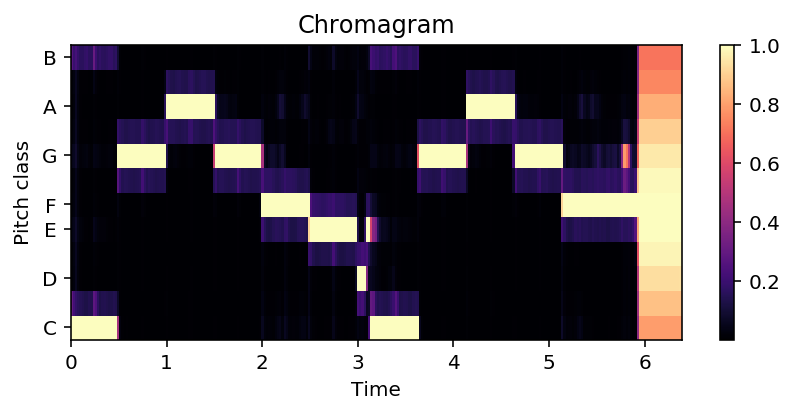

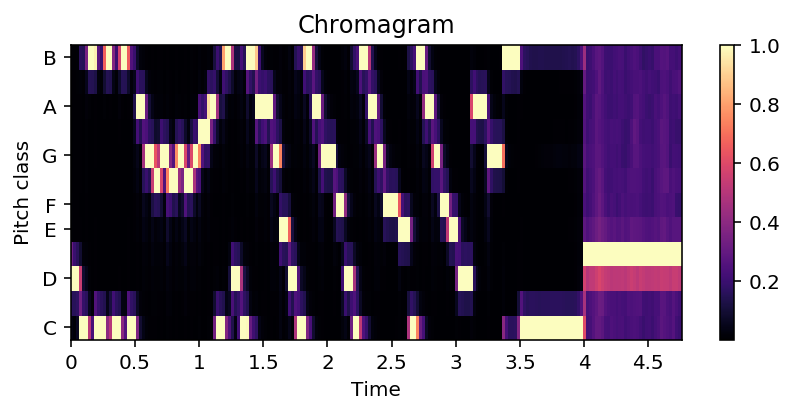

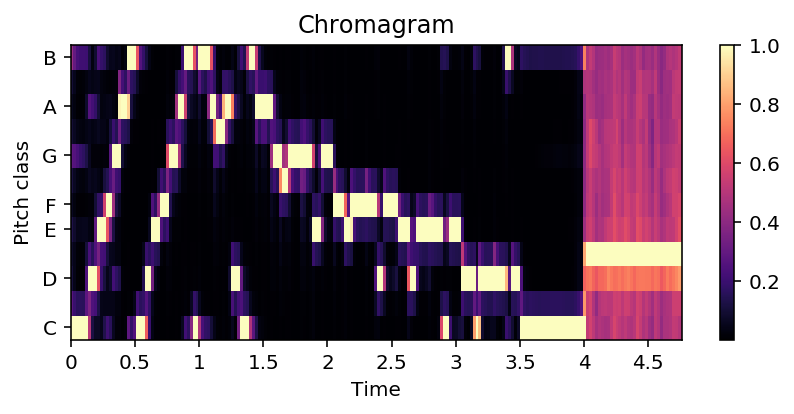

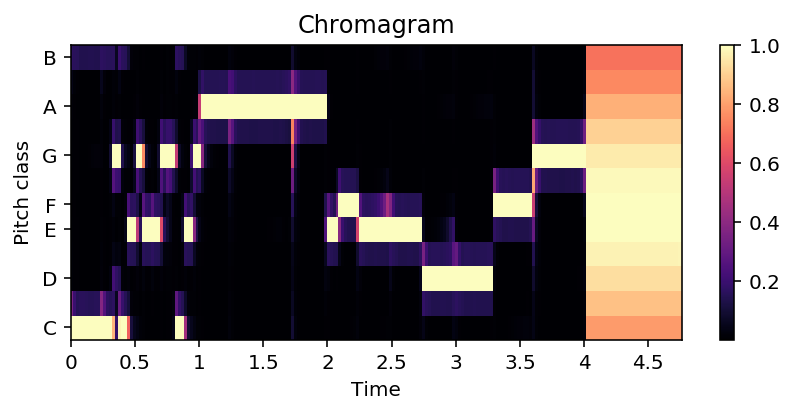

In [167]:
import librosa
import matplotlib.pyplot as plt

y1,sr = librosa.load('out.wav') 
S = np.abs(librosa.stft(y, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
b = librosa.feature.chroma_stft(y=y1, sr=sr,  n_fft=1024, hop_length=512)
plt.figure(figsize=(6, 3))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

y2,sr = librosa.load('out1.wav') 
S = np.abs(librosa.stft(y2, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
plt.figure(figsize=(6, 3))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

y3,sr = librosa.load('out2.wav')
S = np.abs(librosa.stft(y3, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
plt.figure(figsize=(6, 3))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

y4,sr = librosa.load('out4.wav')
S = np.abs(librosa.stft(y4, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
plt.figure(figsize=(6, 3))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

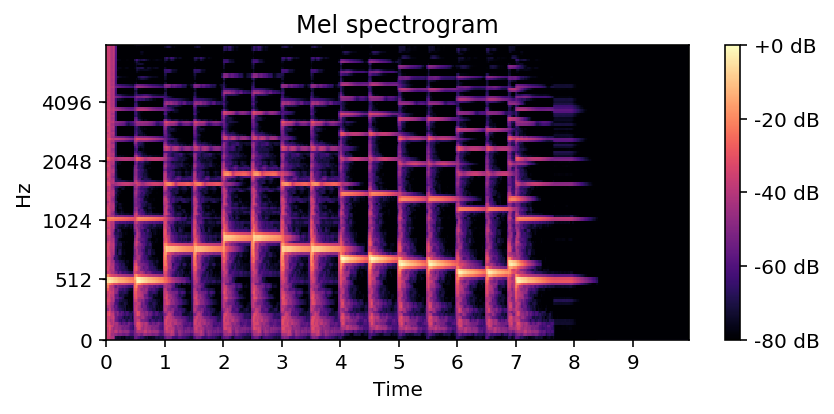

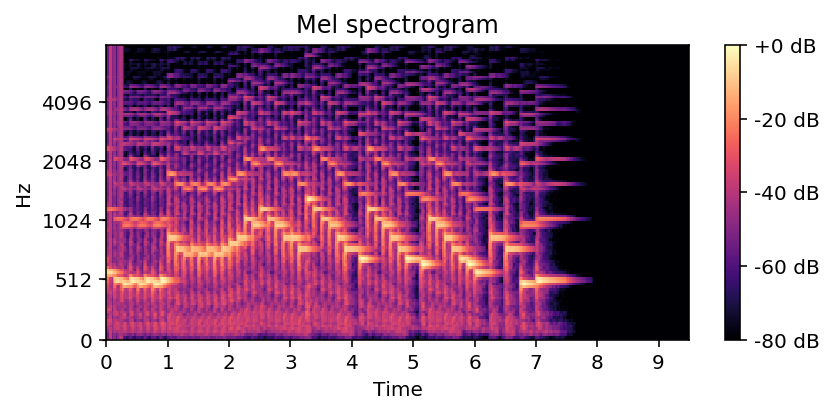

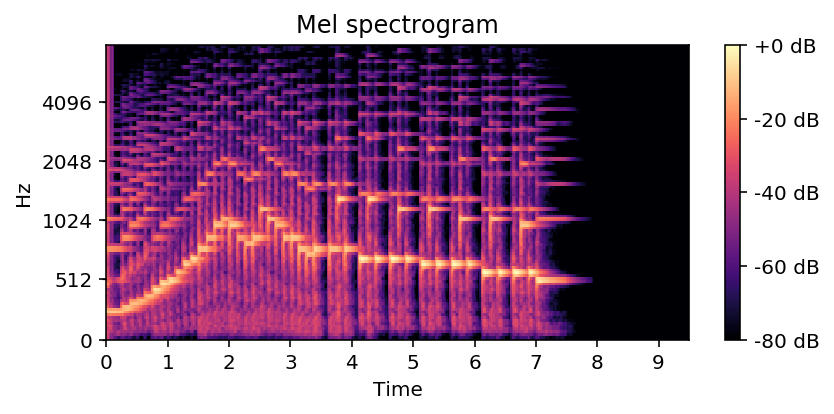

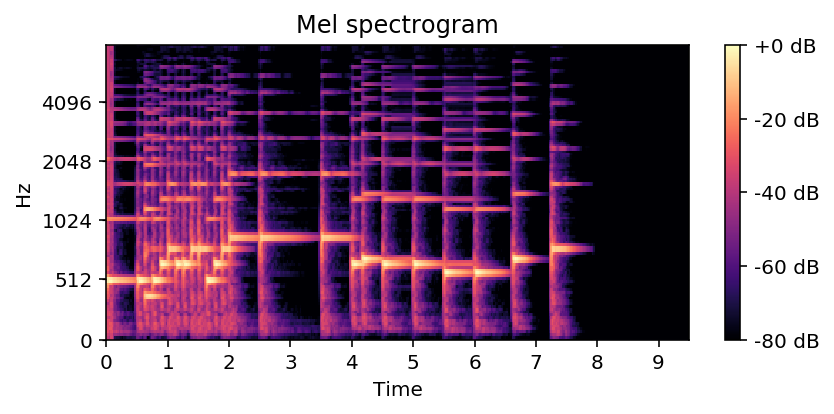

In [168]:
y1,sr = librosa.load('out.wav') 
S = librosa.feature.melspectrogram(y=y1, sr=sr, n_mels=128, fmax=8000)
plt.figure(figsize=(6, 3))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

y2,sr = librosa.load('out1.wav') 
S = librosa.feature.melspectrogram(y=y2, sr=sr, n_mels=128, fmax=8000)
plt.figure(figsize=(6, 3))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

y3,sr = librosa.load('out2.wav') 
S = librosa.feature.melspectrogram(y=y3, sr=sr, n_mels=128, fmax=8000)
plt.figure(figsize=(6, 3))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

y4,sr = librosa.load('out4.wav')
S = librosa.feature.melspectrogram(y=y4, sr=sr, n_mels=128, fmax=8000)
plt.figure(figsize=(6, 3))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()